### The following is the description of the dataset that we are going to use for Two Way ANOVA.


<img src="https://albertapressleader.ca/wp-content/uploads/2020/12/kidney-dialysis.jpg" width = 45%></img>

### Problem Statement:

### The dose for effective dialysis depends on duration of treatment and weight gain between treatments. To study the effects of these two factors on the number of days hospitalized attributable to kidney failure, a random sample of 10 patients per group undergone treatment in a large dialysis facility was obtained. Treatment duration was at 3 levels: short, mid and long. Average weight gain between treatments during the year was categorized into three levels: mild, moderate and severe.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [2]:
df = pd.read_csv('Dialysis+%281%29.csv')

In [3]:
df.head()

,Duration,Weight_Gain,Patient,Days
0,1,1,1,3
1,1,1,2,3
2,1,1,3,14
3,1,1,4,16
4,1,1,5,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Duration     90 non-null     int64
 1   Weight_Gain  90 non-null     int64
 2   Patient      90 non-null     int64
 3   Days         90 non-null     int64
dtypes: int64(4)
memory usage: 2.9 KB


In [5]:
df['Duration'].value_counts()

1    30
2    30
3    30
Name: Duration, dtype: int64

In [6]:
df['Weight_Gain'].value_counts()

1    30
2    30
3    30
Name: Weight_Gain, dtype: int64

In [7]:
df['Patient'].value_counts()

1     9
2     9
3     9
4     9
5     9
6     9
7     9
8     9
9     9
10    9
Name: Patient, dtype: int64

In [10]:
df['Days'].value_counts()

3     10
11     8
13     7
6      7
14     6
16     6
7      6
20     5
18     4
10     4
19     4
9      4
5      3
15     3
17     3
8      3
12     2
2      2
22     1
21     1
4      1
Name: Days, dtype: int64

**Now, let us go ahead and perform one way ANOVA with 'Weight Gain' with respect to 'Days'.**

## The Hypothesis for the One Way ANOVA are:
    
## $H_0$: 
## $H_a$: 

In [13]:
formula = 'Days ~ C(Weight_Gain)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Weight_Gain),2.0,6.822222,3.411111,0.108508,0.897293
Residual,87.0,2734.966667,31.436398,NaN,NaN


**Let us now perform One Way ANOVA with the variable 'Duration' with respect to 'Days'.**

## The Hypothesis for the One Way ANOVA are:
    
## $H_0$: 
## $H_a$: 


In [15]:
formula = 'Days ~ C(Duration)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Duration),2.0,326.955556,163.477778,5.889668,0.003991
Residual,87.0,2414.833333,27.756705,NaN,NaN


**Let us now perform the Two Way ANOVA. We will now analyse the effect of both the treatments on the 'Days' variable.**

In [16]:
formula ='Days ~ C(Weight_Gain) + C(Duration) '
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Weight_Gain),2.0,6.822222,3.411111,0.120408,0.886709
C(Duration),2.0,326.955556,163.477778,5.770576,0.004467
Residual,85.0,2408.011111,28.329542,NaN,NaN


**Let us check whether there is any interaction effect between the treatments.**

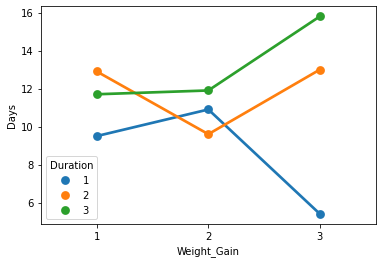

In [17]:
sns.pointplot(x='Weight_Gain', y='Days', data=df, hue='Duration',ci=None);

**Still, we can see that there is some sort of interaction between the two treatments. So, we will introduce a new term while performing the Two Way ANOVA.**

In [18]:
formula = 'Days ~ C(Weight_Gain) + C(Duration) + C(Weight_Gain):C(Duration)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Weight_Gain),2.0,6.822222,3.411111,0.133498,0.875222
C(Duration),2.0,326.955556,163.477778,6.397884,0.002632
C(Weight_Gain):C(Duration),4.0,338.311111,84.577778,3.310045,0.014538
Residual,81.0,2069.700000,25.551852,NaN,NaN


                                                                         ------ Happy Learning------